# NEWS HEADLINES FREQUENCY
## Required Packages

In [2]:
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

## Corpus

In [7]:

with open('Datasets/finalproj_corpus.txt', 'r', encoding='utf-8') as f:
    for line in f:
        print(line[50:150])


s - CNN Open Menu US Crime + Justice Energy + Environment More Extreme Weather Space + Science Audio
enure, saying “we cleaned this county up.” By Jenn Abelson and Reena Flores MORE COVERAGE: No-knock 
e push for reform Loading... Podcast By Washington Post staff No-knock warrants can be easy for poli
 This story has been shared 115,956 times. 115,956 This story has been shared 113,637 times. 113,637
C. All rights reserved.

at least 15 minutes. Market data provided by Factset . Powered and implemented by FactSet Digital So
C. All rights reserved.

at least 15 minutes. Market data provided by Factset . Powered and implemented by FactSet Digital So
C. All rights reserved.

at least 15 minutes. Market data provided by Factset . Powered and implemented by FactSet Digital So


## Data Preprocessing
### Cleaning

In [9]:
import re
line = re.sub(r'[^\w\s]', '',line).lower() # Block-not this characters: words + spaces-Block
print(line[0:1000])


      quotes displayed in realtime or delayed by at least 15 minutes market data provided by factset  powered and implemented by factset digital solutions  legal statement  mutual fund and etf data provided by refinitiv lipper  facebook twitter instagram rss email opinion fox news digital opinion 15 hours ago the nsba addressed joe biden in a letter expressing american public schools are under an immediate threat due to mask mandates crt gender ideology and more ap opinion 8 hours ago the medicare for all act of 2022 which i have just introduced with 15 cosponsors would provide comprehensive health care coverage to every man woman and child in our country reutersscott audettefile photo opinion 10 hours ago big business is no friend to conservativesthats been clear for years and its increasingly no friend to america 3 hours ago now more than ever police should know that american politicians have their backs just as they have ours 8 hours ago the medicare for all act of 2022 which i have

### Tokenization

In [10]:
nltk.download("punkt")
nltk.download("wordnet")
txt_words = nltk.word_tokenize(line)
txt_words[0:20]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['quotes',
 'displayed',
 'in',
 'realtime',
 'or',
 'delayed',
 'by',
 'at',
 'least',
 '15',
 'minutes',
 'market',
 'data',
 'provided',
 'by',
 'factset',
 'powered',
 'and',
 'implemented',
 'by']

### Stopwords

In [21]:
# from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# tokenized and clean str
# remove stop words

corpus_final = []
for i in txt_words:
    if i not in stop_words:
        corpus_final.append(i)
        corpus_final.append(" ")

In [23]:
"".join(corpus_final)

'quotes displayed realtime delayed least 15 minutes market data provided factset powered implemented factset digital solutions legal statement mutual fund etf data provided refinitiv lipper facebook twitter instagram rss email opinion fox news digital opinion 15 hours ago nsba addressed joe biden letter expressing american public schools immediate threat due mask mandates crt gender ideology ap opinion 8 hours ago medicare act 2022 introduced 15 cosponsors would provide comprehensive health care coverage every man woman child country reutersscott audettefile photo opinion 10 hours ago big business friend conservativesthats clear years increasingly friend america 3 hours ago ever police know american politicians backs 8 hours ago medicare act 2022 introduced 15 cosponsors would provide comprehensive health care coverage every man woman child country 10 hours ago big business friend conservativesthats clear years increasingly friend america 12 hours ago families forced compete find neces

## Frequency Words
### Word Counter

In [24]:
from collections import Counter
word_counter = Counter(corpus_final)

In [27]:
unique_words = len(set(word_counter))
unique_words

552

In [31]:
most_common_words = word_counter.most_common()
#remove " " from the list of words
most_common_words[0:20]

[(' ', 941),
 ('ago', 46),
 ('days', 21),
 ('news', 15),
 ('hours', 15),
 ('fox', 12),
 ('day', 11),
 ('opinion', 9),
 ('3', 9),
 ('1', 8),
 ('15', 7),
 ('health', 7),
 ('2', 7),
 ('gutfeld', 6),
 ('tucker', 6),
 ('carlson', 6),
 ('v', 6),
 ('american', 5),
 ('us', 5),
 ('justice', 5)]

In [34]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sent_a = SentimentIntensityAnalyzer()
sent_a.polarity_scores(line)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.096, 'neu': 0.777, 'pos': 0.127, 'compound': 0.991}

 the result is a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.

### WordCLoud

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height= 500).generate_from_frequencies(word_counter)

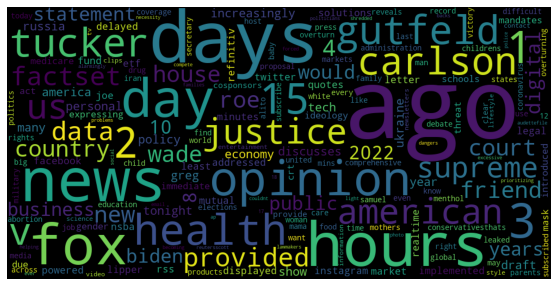

In [38]:
from matplotlib import rcParams

rcParams["figure.figsize"] = (10,5)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()